<a href="https://colab.research.google.com/github/whtan88/Python-Projects/blob/master/Google_Tensorflow_Certificate_Force_Prep_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Key Concepts:


*   Using tensorflow_datasets to load data
*   Preprocessing Augmentation
*   Creating a Callback function
*   Building a model with convolutions and pooling
*   Binary Classification
*   Plotting accuracy and loss metrics
*   Peeling to look at the layers


In [ ]:
#import libraries to use
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img
import random

#important to use for bypassing cert error issues
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
# Converting the output into numpy arrays for easier use of processing. We will be training the model on this later
(training_images, training_labels), (test_images, test_labels) = tfds.as_numpy(tfds.load('horses_or_humans', split = ['train', 'test'], batch_size=-1, as_supervised=True))

# Load this to display the information. The format of the output is different and we won't be using this for training
(data_train, data_val), info= tfds.load('horses_or_humans',split=['train','test'],as_supervised=True,with_info=True)

print(data_train)
print(f'No. of images in train dataset: {len(data_train)}')
print(data_val)
print(f'No. of images in validation dataset: {len(data_val)}')
print('\n')
print('Information')
print('\n')
print(info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteGVIK4P/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteGVIK4P/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
No. of images in train dataset: 1027
<_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
No. of images in validation dataset: 256


Information


tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_dir='/root/tensorflow_datasets/horses_or_humans/3.0.0',
    file_format=tfrecord,
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        

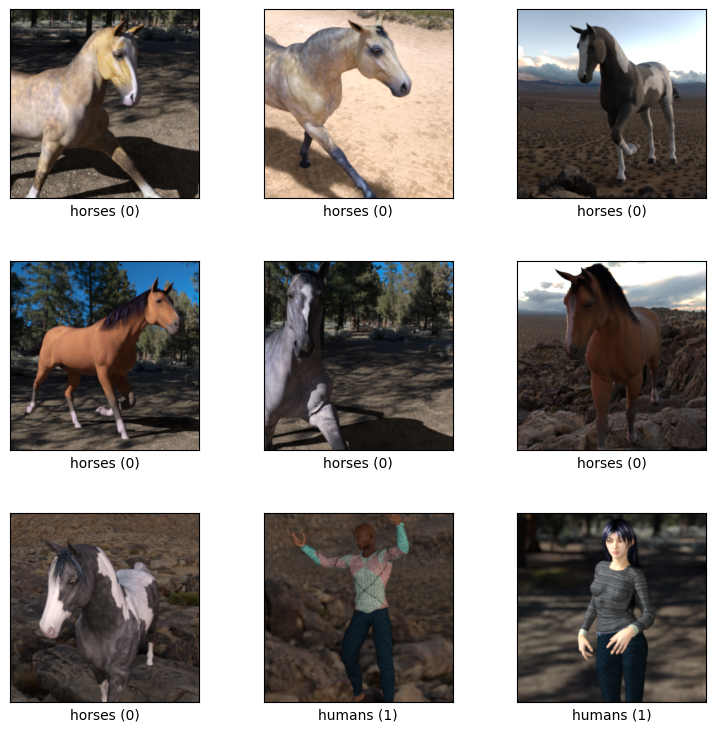

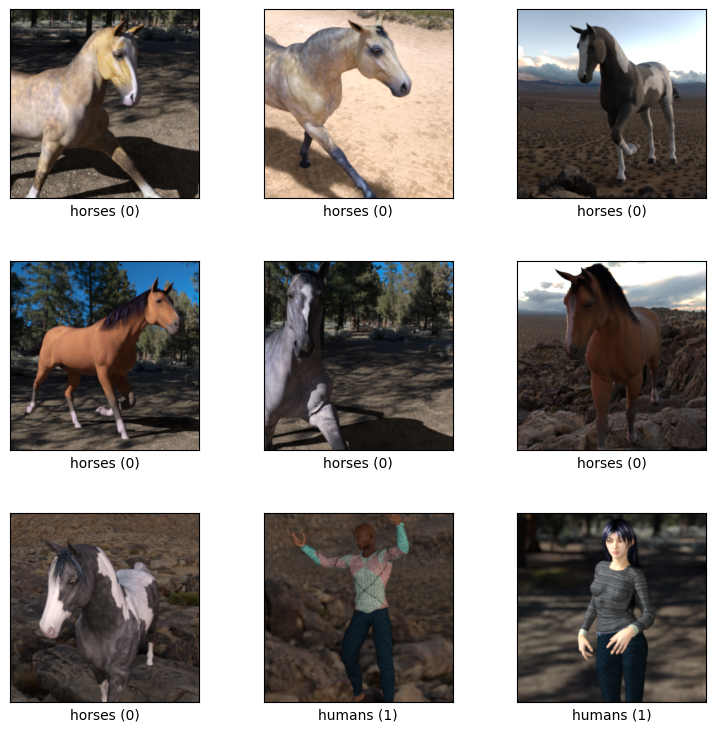

In [ ]:
tfds.show_examples(data_train,info)

In [ ]:
# Create ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow(
        x=training_images,
        y=training_labels,
        batch_size=128,
        seed=8)

validation_generator = validation_datagen.flow(
        x=test_images,
        y=test_labels,
        batch_size=32,
        seed=8)

In [ ]:
# Creating the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [ ]:
# Callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8 or logs.get('val_accuracy')>0.6):
      print("\nReached callback threshold so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy',
metrics=['accuracy'])

history = model.fit(train_generator,verbose=1,epochs=10, validation_data = validation_generator, callbacks=[callbacks])

Epoch 1/10
9/9 [==============================] - 31s 2s/step - loss: 2.2913 - accuracy: 0.5940 - val_loss: 0.7259 - val_accuracy: 0.5117
Epoch 2/10
9/9 [==============================] - 23s 2s/step - loss: 0.5963 - accuracy: 0.6884 - val_loss: 1.2703 - val_accuracy: 0.5117
Epoch 3/10
9/9 [==============================] - 23s 3s/step - loss: 0.4652 - accuracy: 0.7848 - val_loss: 1.5132 - val_accuracy: 0.5898
Epoch 4/10
9/9 [==============================] - ETA: 0s - loss: 0.4075 - accuracy: 0.8111
Reached callback threshold so cancelling training!
9/9 [==============================] - 22s 2s/step - loss: 0.4075 - accuracy: 0.8111 - val_loss: 1.2154 - val_accuracy: 0.6836


Exception ignored in: <function _xla_gc_callback at 0x7a91177eec20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


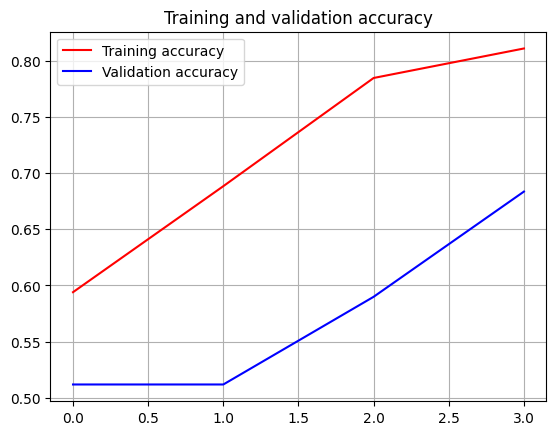

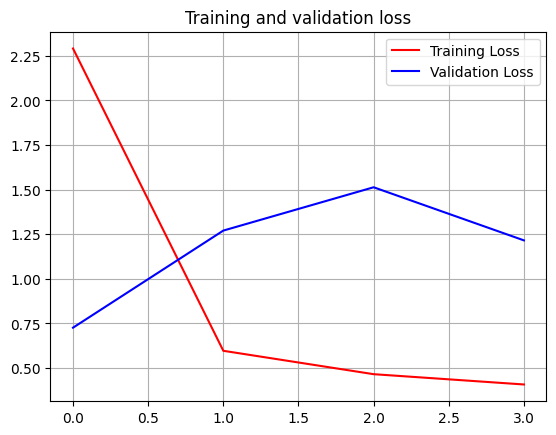

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.grid(True)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.grid(True)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

1/1 [==============================] - 0s 347ms/step


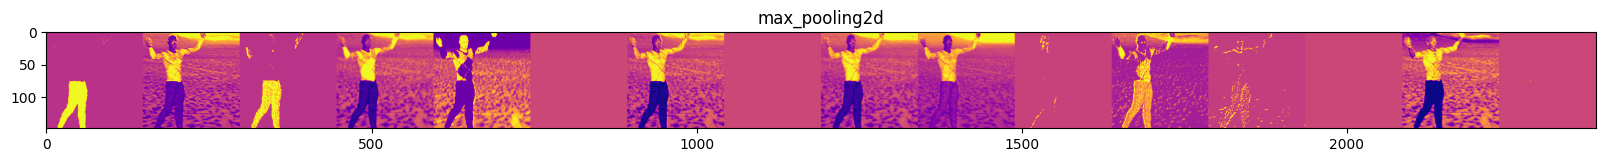

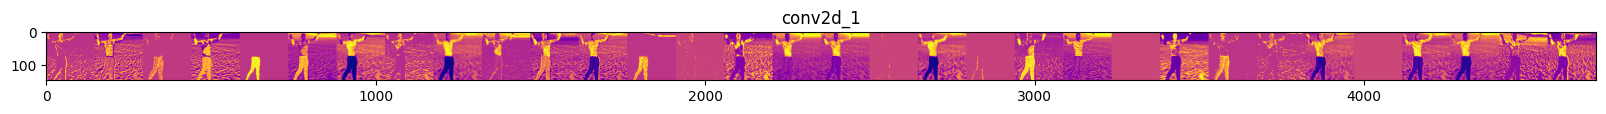

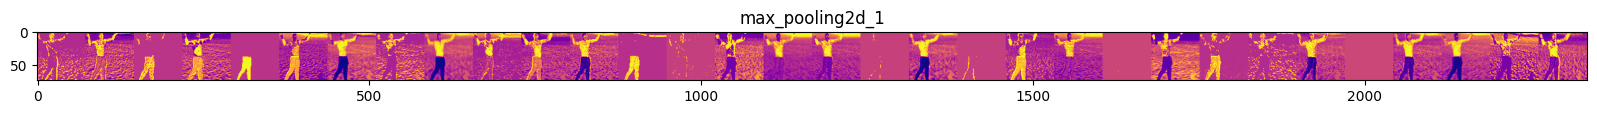

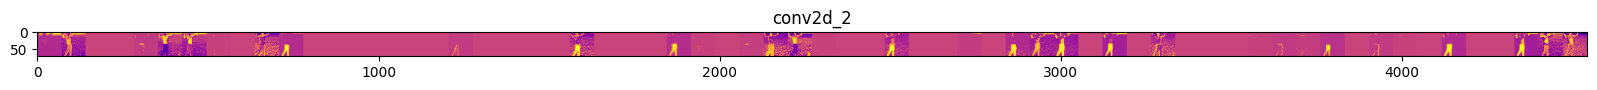

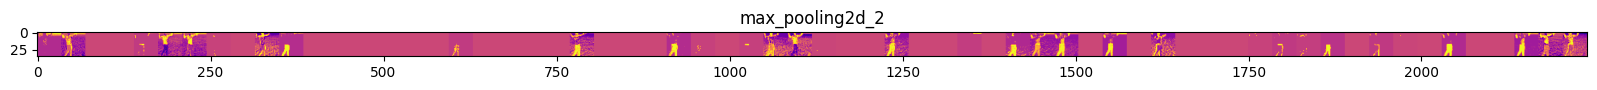

In [ ]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
x = random.choice(training_images)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x = x/255

# Run the image through the network to obtain all intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  # Just do this for the conv / maxpool layers, not the fully-connected layers
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x = x-x.mean()
      if x.std() == 0:
        x = x
      else:
        x = x/x.std()
      x = x*64
      x = x+128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='plasma')
    plt.show()